### Importing the Dependencies ->

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Data Collection ->

In [2]:
# Loading the dataset to Pandas DataFrame
insurance_dataset = pd.read_csv('medical_cost_insurance.csv')

In [3]:
# Number of Rows & Columns
insurance_dataset.shape

(1338, 7)

In [4]:
# First five rows of the dataset
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Information of the dataframe
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##### Here we can understand, we have both Categorical data['sex' ,'smoker' ,'region' ] and Numerical data['age', 'bmi', 'children','charges' ] in the dataset.

In [6]:
# Checking missing/null values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
insurance_dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

###### Here 'charges' is the Target column

In [8]:
# Statistical measures of the Numerical dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Data Analysis and Visualisation of both Categorical data and Numerical data-->


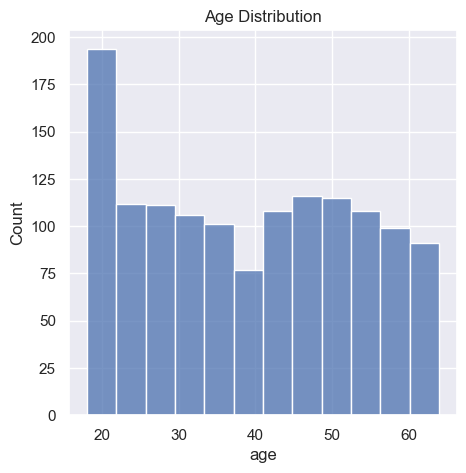

In [9]:
#'age' column
sns.set()
plt.figure(figsize=(5,5))
sns.histplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

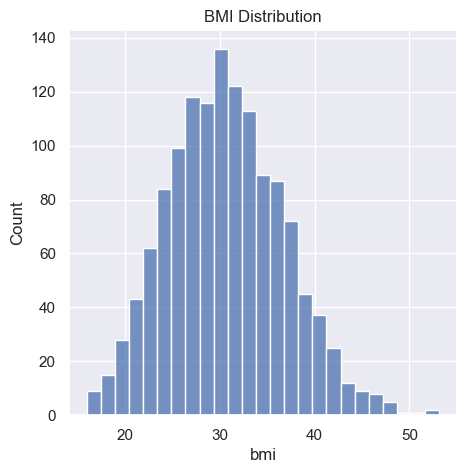

In [10]:
#'bmi' column
sns.set()
plt.figure(figsize=(5,5))
sns.histplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

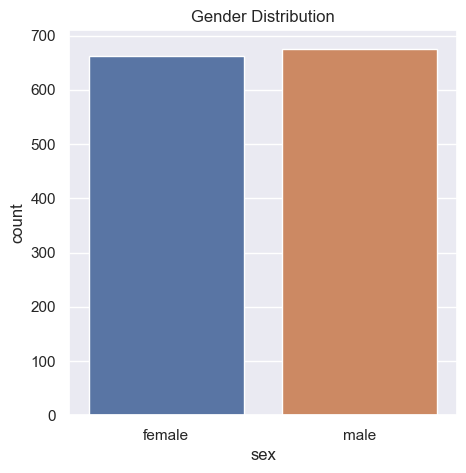

In [11]:
# 'sex' column
plt.figure(figsize=(5,5))
sns.countplot(x='sex', data= insurance_dataset)
plt.title('Gender Distribution')
plt.show()

In [12]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

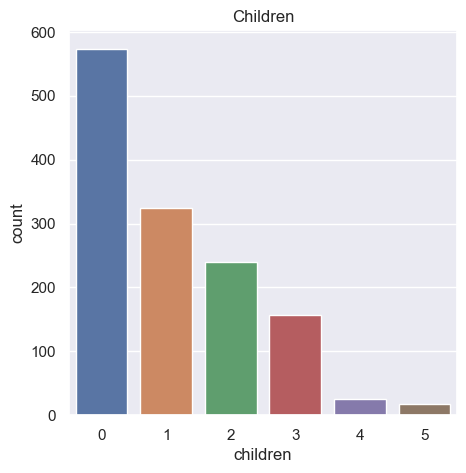

In [13]:
# 'children' column
plt.figure(figsize=(5,5))
sns.countplot(x='children', data= insurance_dataset)
plt.title('Children')
plt.show()

In [14]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

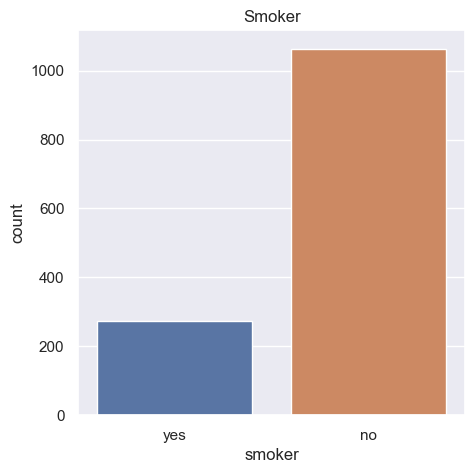

In [15]:
# 'smoker' column
plt.figure(figsize=(5,5))
sns.countplot(x='smoker', data= insurance_dataset)
plt.title('Smoker')
plt.show()

In [16]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

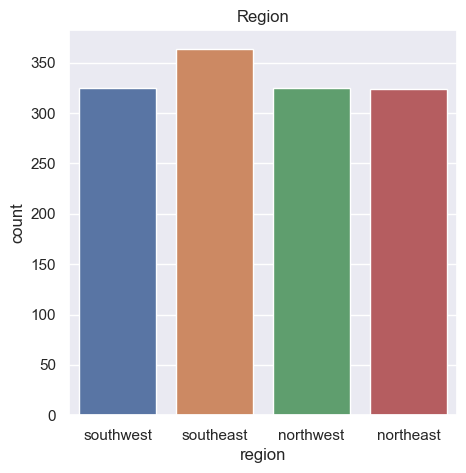

In [17]:
# 'region' column
plt.figure(figsize=(5,5))
sns.countplot(x='region', data= insurance_dataset)
plt.title('Region')
plt.show()

In [18]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

##### Now we plot every Categorical columns against the Target column-->

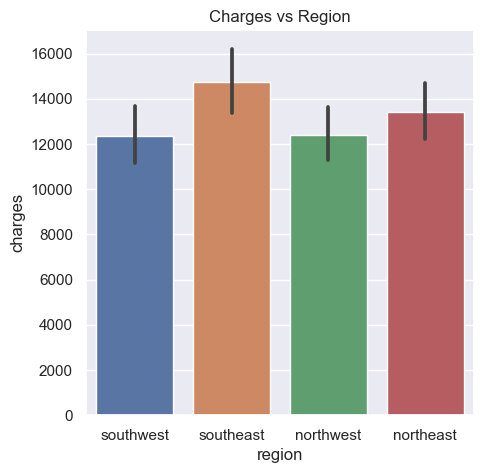

In [19]:
# 'charges' vs 'region'
plt.figure(figsize=(5,5))
sns.barplot(x='region', y='charges', data= insurance_dataset)
plt.title('Charges vs Region')
plt.show()

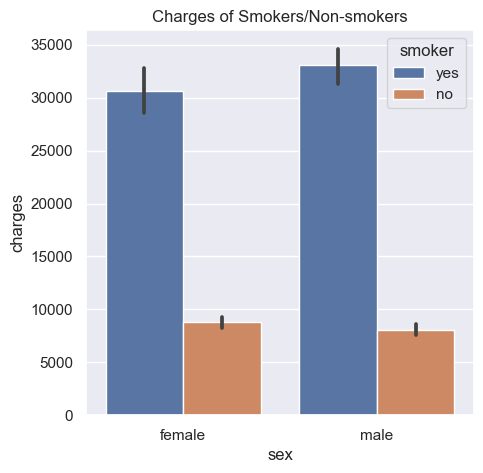

In [20]:
# 'charges' vs 'smoker'
plt.figure(figsize=(5,5))
sns.barplot(x='sex', y='charges', hue='smoker', data= insurance_dataset)
plt.title('Charges of Smokers/Non-smokers')
plt.show()

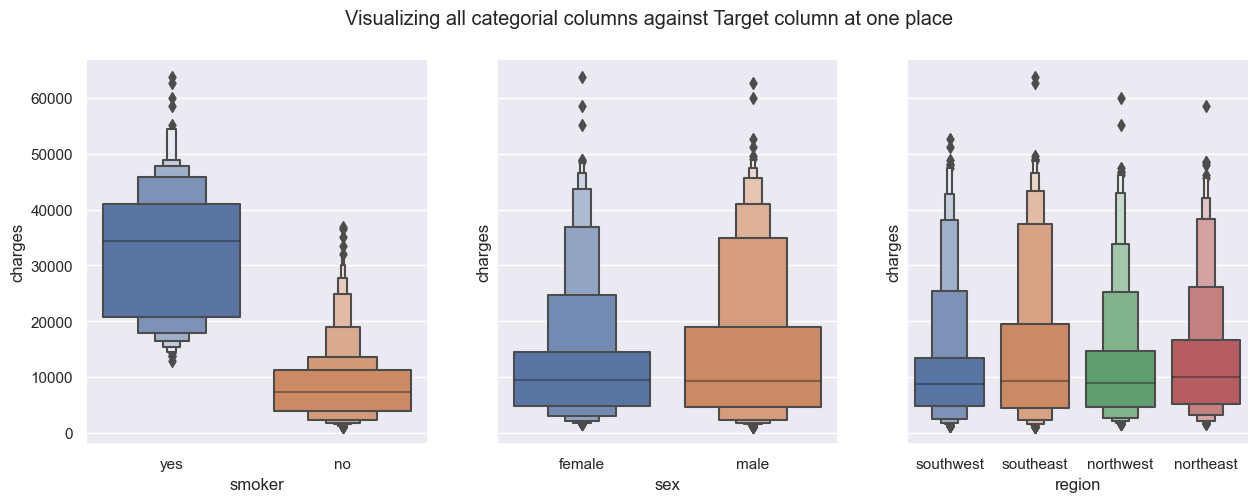

In [21]:
# Visualizing all categorial columns against Target column at one place
fig, axes = plt.subplots(1,3, figsize=(15,5),sharey= True)
fig.suptitle('Visualizing all categorial columns against Target column at one place')

sns.boxenplot(x='smoker', y='charges', data= insurance_dataset, ax=axes[0])
sns.boxenplot(x='sex', y='charges', data= insurance_dataset, ax=axes[1])
sns.boxenplot(x='region', y='charges', data= insurance_dataset, ax=axes[2])

plt.show()

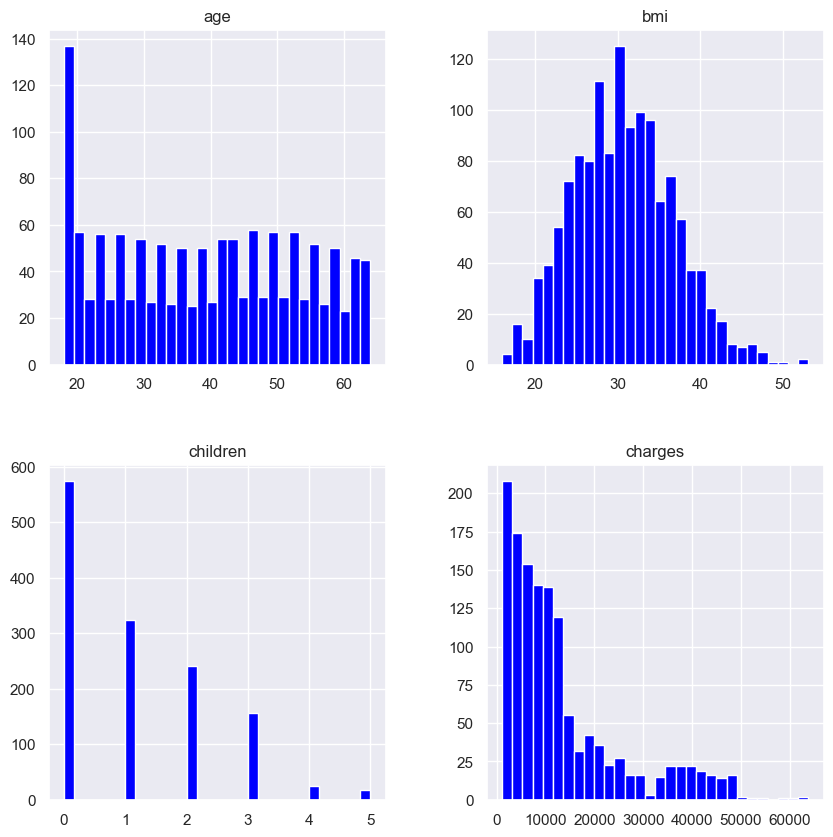

In [22]:
#Plotting histogram using the Numerical columns at one place
insurance_dataset[['age', 'bmi', 'children', 'charges']].hist(bins=30, figsize=(10,10),color='blue')
plt.show()

### Data Preprocessing-->>

In [23]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [24]:
#Converting Categorical variables['sex','smoker','region'] into Numerical format
insurance_dataset['sex']=insurance_dataset['sex'].map({'female':0,'male':1})
insurance_dataset['smoker']=insurance_dataset['smoker'].map({'yes':1,'no':0})
insurance_dataset['region']=insurance_dataset['region'].map({'southwest':1,'southeast':2,'northwest':3,'northeast':4})

In [25]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


#### Correlation Matrix-->

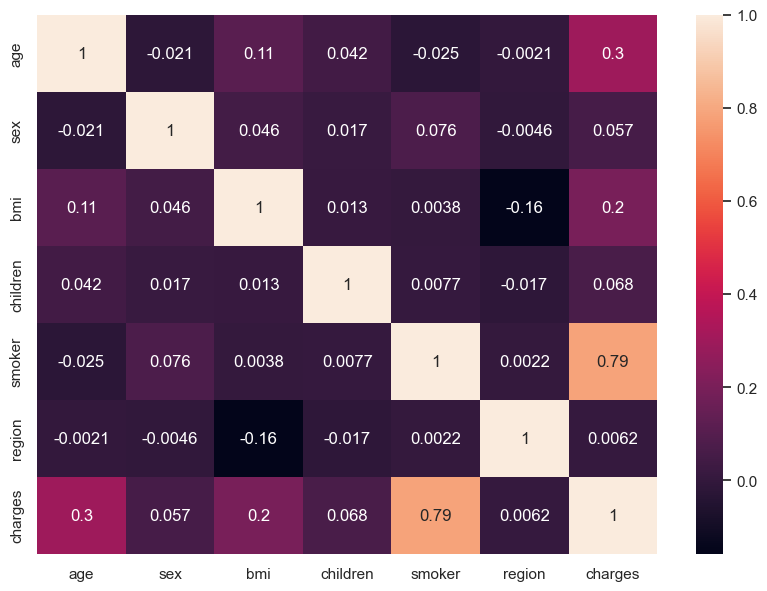

In [26]:
#Creating a HEATMAP of our data to see the attributes/variables that have high Correlation
plt.figure(figsize=(10,7))
sns.heatmap(insurance_dataset.corr(),annot= True)
plt.show()

###### Lighter values indicates the High Correlation and Darker values indicates the very Low Correlation.So from this heatmap we can see that the 'smoker' attribute has a very high cortrelation with the Target variable and the 'sex' attribute has very low correlation with the Target variable.

### Splitting the Features/Predictors and Target variables--->>>

In [27]:
X= insurance_dataset.drop(columns=['charges','sex'],axis=1)
y= insurance_dataset['charges']

#we are dropping the Target column and 'sex' column as it has very low correlation.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (936, 5)
X_test shape:  (402, 5)
y_train shape:  (936,)
y_test shape:  (402,)


### MODEL Training--->>

Lets create a Linear Regression Model--> 

In [29]:
#first we have to load the Linear Regression Model
linreg=LinearRegression()

In [30]:
# fit the training data on the Linear Regression Model and create a variable(pred) to store the predicted values
linreg.fit(X_train,y_train)
pred = linreg.predict(X_test)

In [31]:
#Now we see how well the model fits the data and for this we are going to calculate the r2 score
from sklearn.metrics import r2_score

In [32]:
print("R2 score: ", (r2_score(y_test,pred)))

R2 score:  0.7697211527941855


The r square is an indication of how well the model fits the given data.So a higher r2 value indicates a better fit.Here we have a good model as we have a higher r2 score.We can also plot a graph to see how well a mofdel predicts.To do that we can create a plot of the actual vs predicted values.So let's create a scatter plot-

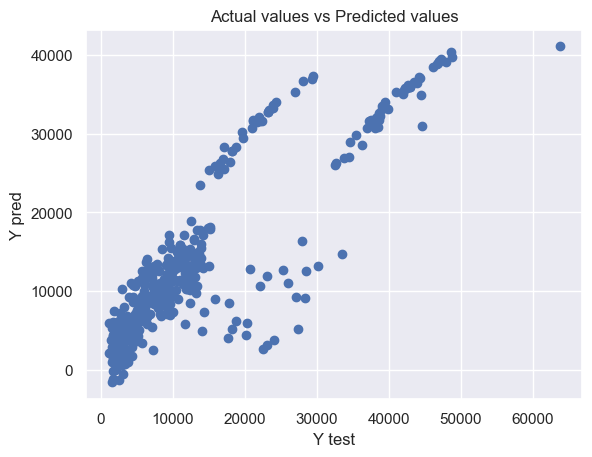

In [33]:
plt.scatter(y_test, pred)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.title('Actual values vs Predicted values')
plt.show()

### Building a PREDICTIVE SYSTEM->

Now as we trained and tested our model let's predict the insurance charges for a new customer.So let's create a sample data-

In [34]:
#sample data
data = {'age':52, 'bmi':27, 'children':2, 'smoker':0, 'region':2}
index =[0]
cust_df = pd.DataFrame(data, index)
cust_df

,age,bmi,children,smoker,region
0,52,27,2,0,2


In [35]:
#predicting insurance charges for the above sample data
charge_pred = linreg.predict(cust_df)
print("The Medical Insurance Cost of the sample Customer is: ", charge_pred)

The Medical Insurance Cost of the sample Customer is:  [10792.30897866]


In [36]:
#sample data2(for a smoker)
data = {'age':52, 'bmi':27, 'children':2, 'smoker':1, 'region':2}
index =[0]
cust_df = pd.DataFrame(data, index)
cust_df

,age,bmi,children,smoker,region
0,52,27,2,1,2


In [37]:
#predicting insurance charges for the above sample data
charge_pred = linreg.predict(cust_df)
print("The Medical Insurance Cost of the sample Customer is: ", charge_pred)

The Medical Insurance Cost of the sample Customer is:  [34419.37149091]


#### Here we see, after changing a value of attribute we get changed predicted value.Therefore we finally build a predictive system.
### ___________________________________________________________________________________________